# Dashboard Prototype — Hito 2

Este notebook es un prototipo académico de tablero de seguimiento para el Hito 2 del proyecto de Ingeniería de Datos.

**Objetivos:**
- Cargar y explorar el dataset procesado
- Realizar análisis descriptivo
- Visualizar evolución temporal e indicadores comparados

In [1]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración visual
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print('✓ Librerías importadas correctamente')

✓ Librerías importadas correctamente


## 1. Carga del dataset

El archivo está ubicado en `../data/processed/indicators_tidy.csv` y ha sido generado por el pipeline ETL.
Las columnas esperadas son: `date`, `value`, `indicator`, `source`, `unit`, `frequency`.

In [2]:
# Cargar datos desde archivo CSV
path = '../data/processed/indicators_tidy.csv'
df = pd.read_csv(path, parse_dates=['date'])

# Extraer año de la columna 'date'
df['year'] = df['date'].dt.year

# Asegurar que 'value' sea tipo numérico
df['value'] = pd.to_numeric(df['value'], errors='coerce')

print(f'✓ Dataset cargado: {len(df)} registros')
print(f'✓ Rango de fechas: {df["date"].min().date()} a {df["date"].max().date()}')

✓ Dataset cargado: 688 registros
✓ Rango de fechas: 1999-03-31 a 2023-12-31


## 2. Exploración básica de datos

Visualizamos la estructura, primeras filas y estadísticas descriptivas del dataset.

In [3]:
# Primeras filas
print('=== PRIMERAS FILAS DEL DATASET ===')
display(df.head(10))

=== PRIMERAS FILAS DEL DATASET ===


,date,value,indicator,source,unit,frequency,year
0,2005-03-31,7847.435946,FBCF - Otros edificios y estructuras (AN112),DANE - Cuentas Nacionales (Cuadro 5),"(según anexo, valores en constantes)",Trimestral,2005
1,2005-06-30,6994.537885,FBCF - Otros edificios y estructuras (AN112),DANE - Cuentas Nacionales (Cuadro 5),"(según anexo, valores en constantes)",Trimestral,2005
2,2005-09-30,8980.227274,FBCF - Otros edificios y estructuras (AN112),DANE - Cuentas Nacionales (Cuadro 5),"(según anexo, valores en constantes)",Trimestral,2005
3,2005-12-31,11904.798895,FBCF - Otros edificios y estructuras (AN112),DANE - Cuentas Nacionales (Cuadro 5),"(según anexo, valores en constantes)",Trimestral,2005
4,2006-03-31,7863.165875,FBCF - Otros edificios y estructuras (AN112),DANE - Cuentas Nacionales (Cuadro 5),"(según anexo, valores en constantes)",Trimestral,2006
5,2006-06-30,8031.845947,FBCF - Otros edificios y estructuras (AN112),DANE - Cuentas Nacionales (Cuadro 5),"(según anexo, valores en constantes)",Trimestral,2006
6,2006-09-30,10307.684579,FBCF - Otros edificios y estructuras (AN112),DANE - Cuentas Nacionales (Cuadro 5),"(según anexo, valores en constantes)",Trimestral,2006
7,2006-12-31,12634.303600,FBCF - Otros edificios y estructuras (AN112),DANE - Cuentas Nacionales (Cuadro 5),"(según anexo, valores en constantes)",Trimestral,2006
8,2007-03-31,9500.733729,FBCF - Otros edificios y estructuras (AN112),DANE - Cuentas Nacionales (Cuadro 5),"(según anexo, valores en constantes)",Trimestral,2007
9,2007-06-30,10926.731754,FBCF - Otros edificios y estructuras (AN112),DANE - Cuentas Nacionales (Cuadro 5),"(según anexo, valores en constantes)",Trimestral,2007


In [4]:
# Información general (esquema)
print('\n=== ESQUEMA DEL DATASET ===')
df.info()


=== ESQUEMA DEL DATASET ===
<class 'pandas.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       688 non-null    datetime64[us]
 1   value      688 non-null    float64       
 2   indicator  688 non-null    str           
 3   source     688 non-null    str           
 4   unit       688 non-null    str           
 5   frequency  688 non-null    str           
 6   year       688 non-null    int32         
dtypes: datetime64[us](1), float64(1), int32(1), str(4)
memory usage: 92.7 KB


In [5]:
# Estadísticas descriptivas
print('\n=== ESTADÍSTICAS DESCRIPTIVAS ===')
display(df['value'].describe())

# Información sobre indicadores
print('\n=== INDICADORES DISPONIBLES ===')
print(f'Número de indicadores: {df["indicator"].nunique()}')
print('\nIndicadores:')
for i, ind in enumerate(df['indicator'].unique(), 1):
    count = len(df[df['indicator'] == ind])
    print(f'  {i}. {ind} ({count} registros)')


=== ESTADÍSTICAS DESCRIPTIVAS ===


count      688.000000
mean      1772.879498
std       4496.428661
min          1.999636
25%         38.287901
50%         78.967677
75%        174.147187
max      21319.543752
Name: value, dtype: float64


=== INDICADORES DISPONIBLES ===
Número de indicadores: 8

Indicadores:
  1. FBCF - Otros edificios y estructuras (AN112) (76 registros)
  2. GEIH - Ocupados (Construcción) (84 registros)
  3. IIOC - Total (88 registros)
  4. IIOC - 4001 (vías/carreteras/puentes) (88 registros)
  5. IIOC - 4002 (férreas/aeropuertos/transporte masivo) (88 registros)
  6. IIOC - 4003 (puertos/represas/acueductos/alcantarillado) (88 registros)
  7. IIOC - 4004 (minería/tuberías) (88 registros)
  8. IIOC - 4008 (otras obras de ingeniería) (88 registros)


## 3. Visualización 1: Evolución temporal (line plot)

Mostramos la tendencia de cada indicador a lo largo del tiempo. Para mayor claridad, se agregan los valores por año (promedio) cuando hay múltiples registros por año.

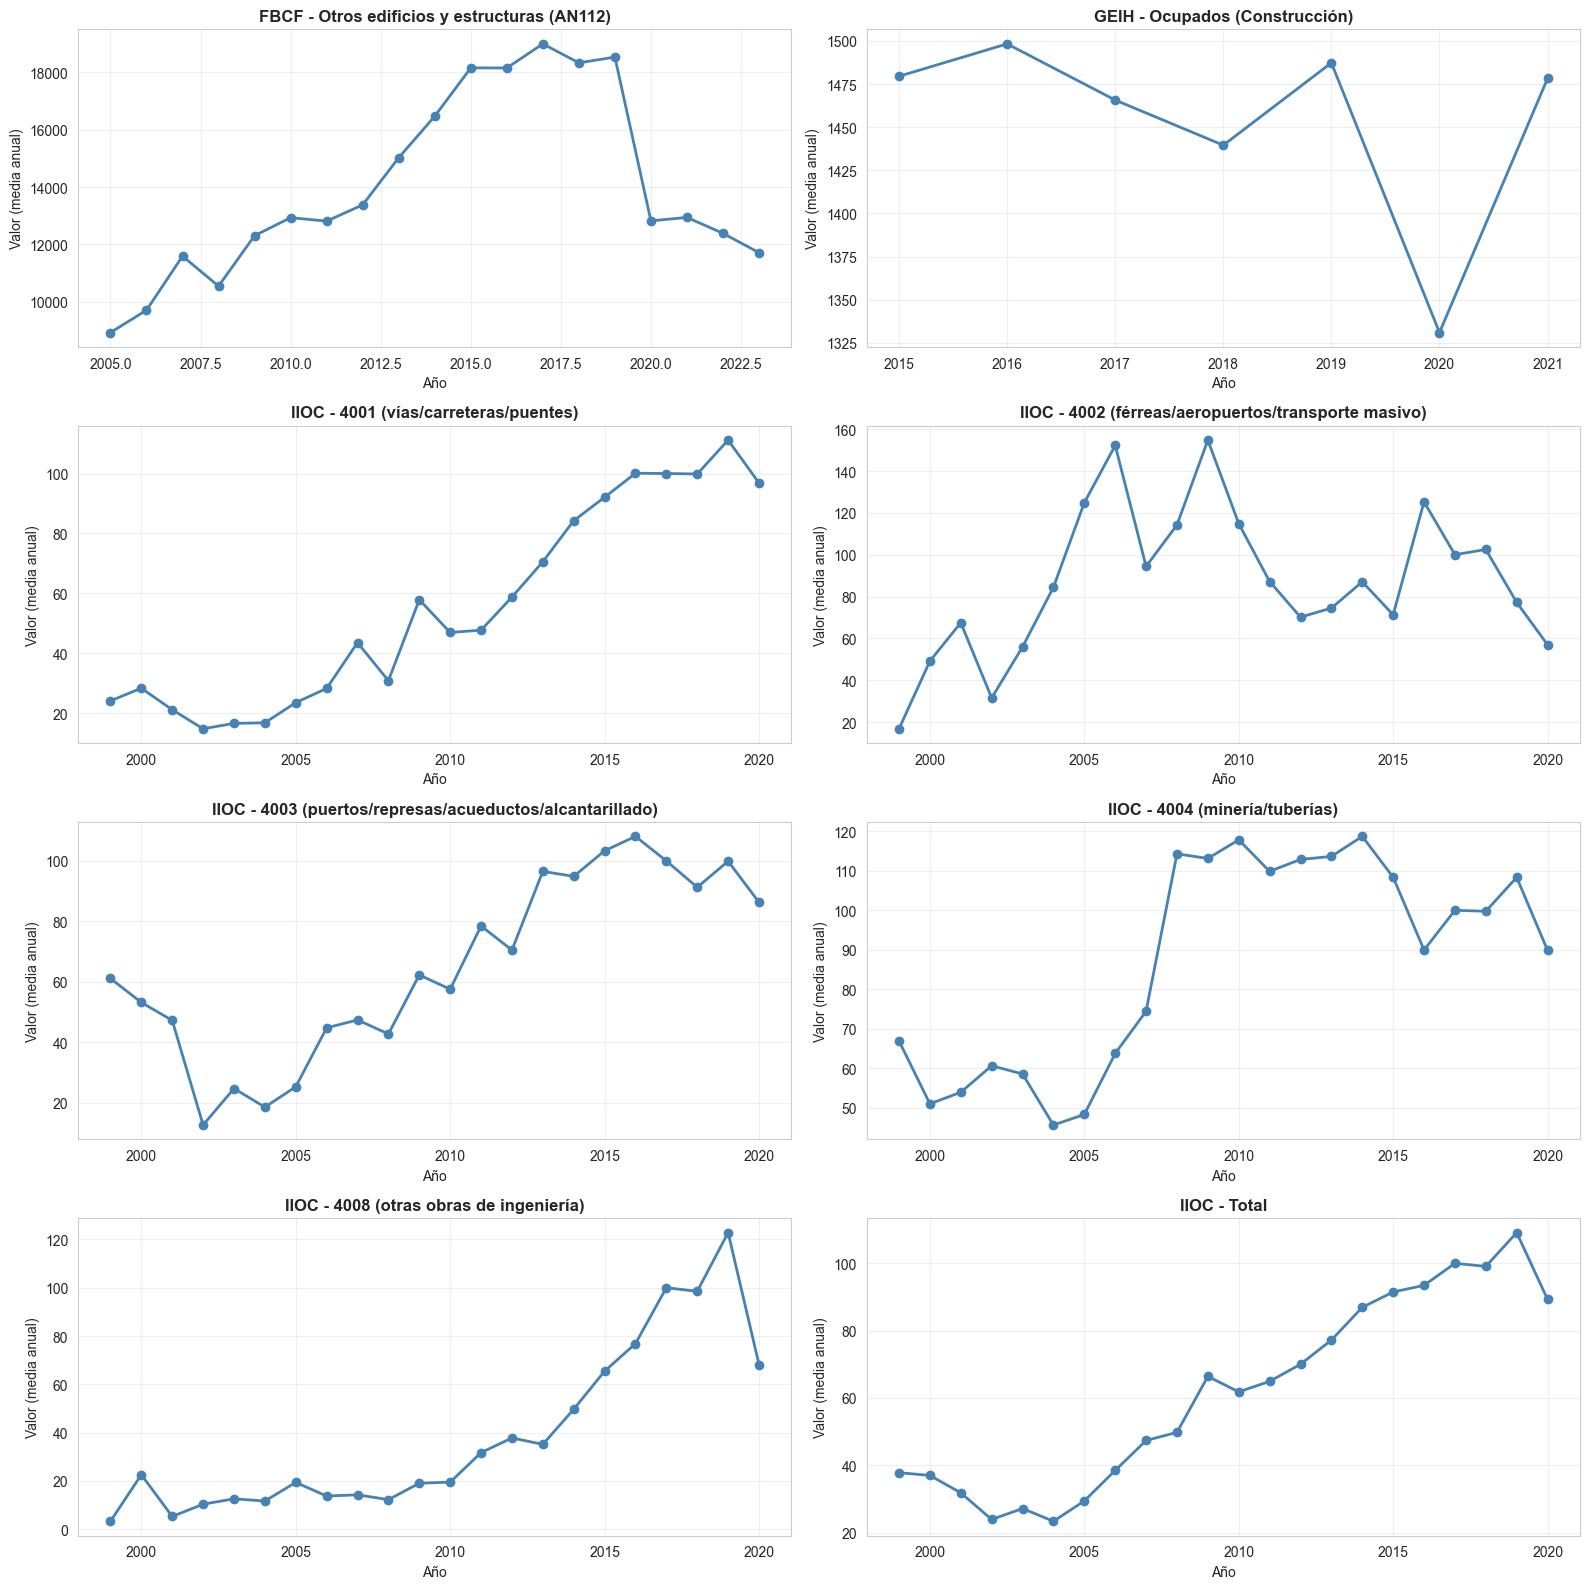

✓ Gráfico de evolución temporal guardado en reports/evolution_temporal.png


In [6]:
# Agregar datos por año e indicador (promedio anual)
yearly = df.groupby(['year', 'indicator'], as_index=False)['value'].mean()

# Crear figura con subplots (un subplot por indicador)
indicators = sorted(df['indicator'].unique())
n_indicators = len(indicators)
n_cols = 2
n_rows = (n_indicators + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
axes = axes.flatten()  # convertir a array 1D

for idx, indicator in enumerate(indicators):
    ax = axes[idx]
    data = yearly[yearly['indicator'] == indicator].sort_values('year')
    
    ax.plot(data['year'], data['value'], marker='o', linestyle='-', linewidth=2, markersize=6, color='steelblue')
    ax.set_title(f'{indicator}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Año')
    ax.set_ylabel('Valor (media anual)')
    ax.grid(True, alpha=0.3)

# Ocultar subplots no usados
for idx in range(len(indicators), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('../reports/evolution_temporal.png', dpi=300, bbox_inches='tight')
plt.show()

print('✓ Gráfico de evolución temporal guardado en reports/evolution_temporal.png')

## 4. Visualización 2: Comparación de indicadores

Comparamos el valor promedio por indicador (agregado sobre todo el período de tiempo). Esto permite identificar cuáles indicadores tienen magnitudes mayores en general.

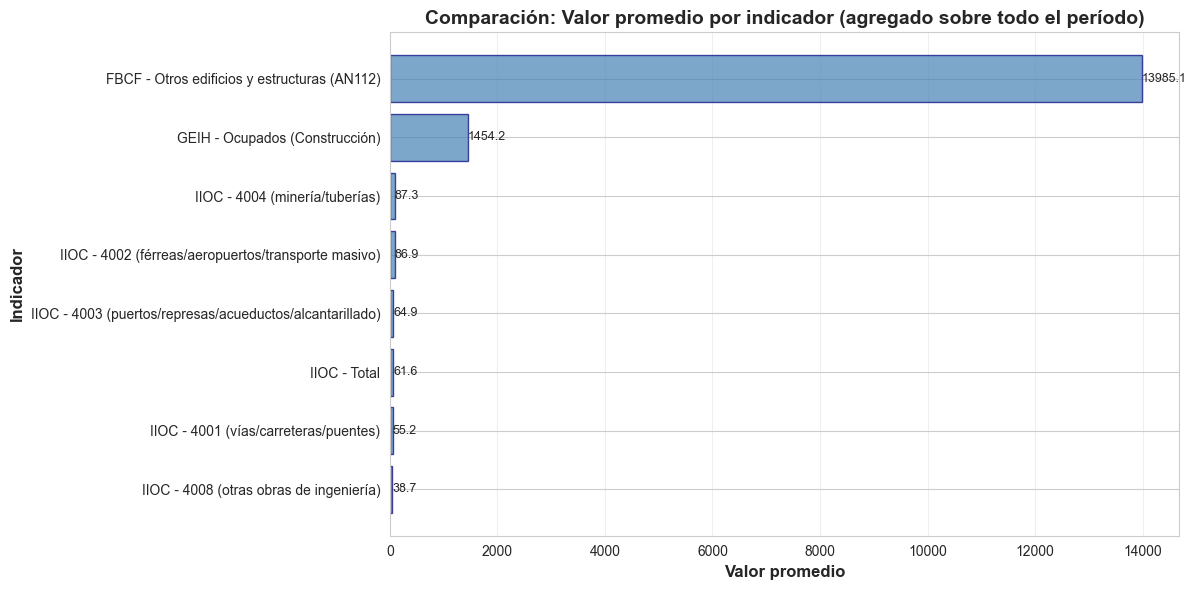

✓ Gráfico de comparación guardado en reports/comparison_indicators.png


In [7]:
# Agregar: promedio general por indicador
agg_indicators = df.groupby('indicator', as_index=False).agg({
    'value': ['mean', 'std', 'min', 'max', 'count']
}).round(2)
agg_indicators.columns = ['indicator', 'mean', 'std', 'min', 'max', 'count']
agg_indicators = agg_indicators.sort_values('mean', ascending=True)  # para gráfico horizontal

# Gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(agg_indicators['indicator'], agg_indicators['mean'], 
                color='steelblue', edgecolor='navy', alpha=0.7)

ax.set_xlabel('Valor promedio', fontsize=12, fontweight='bold')
ax.set_ylabel('Indicador', fontsize=12, fontweight='bold')
ax.set_title('Comparación: Valor promedio por indicador (agregado sobre todo el período)', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

# Añadir valores en las barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, 
            f'{width:.1f}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('../reports/comparison_indicators.png', dpi=300, bbox_inches='tight')
plt.show()

print('✓ Gráfico de comparación guardado en reports/comparison_indicators.png')

## 5. Resumen de estadísticas por indicador

Tabla resumen con estadísticas clave de cada indicador.

In [8]:
# Mostrar tabla de resumen
print('\n=== RESUMEN ESTADÍSTICO POR INDICADOR ===')
display(agg_indicators)


=== RESUMEN ESTADÍSTICO POR INDICADOR ===


,indicator,mean,std,min,max,count
6,IIOC - 4008 (otras obras de ingeniería),38.66,38.74,2.00,181.76,88
2,IIOC - 4001 (vías/carreteras/puentes),55.19,38.32,7.53,163.63,88
7,IIOC - Total,61.63,36.01,12.86,162.29,88
4,IIOC - 4003 (puertos/represas/acueductos/alcan...,64.88,37.85,6.91,154.45,88
3,IIOC - 4002 (férreas/aeropuertos/transporte ma...,86.94,47.46,10.49,222.69,88
5,IIOC - 4004 (minería/tuberías),87.28,47.54,14.61,209.25,88
1,GEIH - Ocupados (Construcción),1454.22,125.41,878.33,1722.91,84
0,FBCF - Otros edificios y estructuras (AN112),13985.07,3661.73,6994.54,21319.54,76


## 6. Conclusiones y próximos pasos

### Hallazgos principales:
- El dataset contiene **8 indicadores** distribuidos entre datos **trimestrales** (FBCF, IIOC) y **mensuales** (GEIH).
- El período de cobertura es amplio (desde 1999 hasta 2023), aunque con diferentes rangos por indicador.
- No se detectaron duplicados en la exploración anterior.

### Próximas mejoras:
1. Añadir interactividad con widgets para seleccionar indicadores y rangos de tiempo.
2. Normalizar valores para comparar indicadores con diferentes escalas.
3. Generar reportes automáticos de calidad y anomalías.
4. Integrar predicciones simples (trend analysis, forecasting).
5. Crear tablero web interactivo con Plotly o Streamlit.